In [1]:
from sklearn.model_selection import train_test_split#数据划分

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
path1 = 'datas/household_power_consumption_1000.txt'
df = pd.read_csv(path1,sep=';',low_memory=False)

In [4]:
new_df = df.replace('?',np.nan)
datas= new_df.dropna(axis=0,how='any')
datas.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.418772,0.089232,240.03579,10.351000,0.0,2.749000,5.756000
std,1.239979,0.088088,4.08442,5.122214,0.0,8.104053,8.066941
min,0.206000,0.000000,230.98000,0.800000,0.0,0.000000,0.000000
25%,1.806000,0.000000,236.94000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.65000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.29500,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.37000,33.200000,0.0,38.000000,19.000000


In [5]:
X =datas.iloc[:,2:4]
Y2 = datas.iloc[:,5]
X2_train,X2_test,Y2_train,Y2_test= train_test_split(X,Y2,test_size=0.2,random_state=0)

In [6]:
X = np.mat(X2_train)
# reshape=(-1,1)可以让Y转置
Y = np.mat(Y2_train).T

In [7]:
theta =(X.T*X).I*X.T*Y

In [8]:
y_hat = np.mat(X2_test)*theta

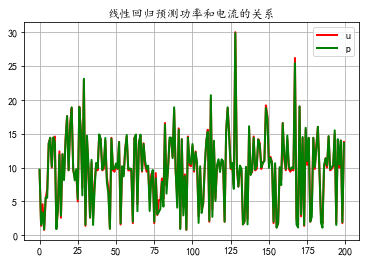

In [9]:
t = np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t,Y2_test,'r-',linewidth=2,label='真实值')
plt.plot(t,y_hat,'g-',linewidth=2,label="预测值")
plt.legend('upper left')
plt.title('线性回归预测功率和电流的关系')
plt.grid(b=True)
plt.show()